## Heart Attack Analysis and Prediction

### This dataset contains information about people and there chances of getting a heart attack

### Dataset Information:

#### Age : Age of the patient
#### Sex : Sex of the patient
#### exang : exercise induced angina (1 = yes; 0 = no)
#### caa : number of major vessels (0-3)
#### cp : Chest Pain type chest pain type
##### Value 1: typical angina
##### Value 2: atypical angina
##### Value 3: non-anginal pain
##### Value 4: asymptomatic
#### trtbps : resting blood pressure (in mm Hg)
#### chol : cholestoral in mg/dl fetched via BMI sensor
#### fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#### rest_ecg : resting electrocardiographic results
##### Value 0: normal
##### Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
##### Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
#### thalach : maximum heart rate achieved
#### oldpeak : ST depression induced by exercise relative to rest
#### slope : the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
#### target :
##### 0 = less chance of heart attack
##### 1 = more chance of heart attack

### Objective:

#### 1. With the dataset provided for heart attack analysis, we have to analyse the possibilities of heart attack on the basis of various features provided to us, and then the prediction from the data analysis will tell us that whether an individual is prone to heart attack or not.
#### 2. The detailed analysis can proceed with the exploratory data analysis (EDA).
#### 3. The classification for predication can be done using various machine learning model algorithms, choose the best suited model for heart attack analysis

### Questions to be answered:

#### Q1. Does the age of a person contribute towards heart attack?
#### Q2. Are different types of chest pain related to each other or the possibility of getting a heart attack?
#### Q3. Does high blood pressure increase the risk of heart attack?
#### Q4. Does the choestrol level eventually contribute as a risk factor towards heart attack?

In [91]:
# Heart Attack Analysis and Prediction Engine
# Date: April 30, 2021

In [92]:
# Importing necessary libraries

import pandas as pd   #Data Processing
import numpy as np    #Linear algebra

import matplotlib.pyplot as plt  #Data visualization
import seaborn as sns  #Data visualization
import scipy.stats as sci #Data visualization

import warnings
warnings.filterwarnings("ignore") #to ignore the warnings

# For Model Building
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from collections import OrderedDict
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.feature_selection import RFECV

In [93]:
# Loading the dataset

data =  pd.read_excel('Heart Attack Analysis & Prediction Dataset.xlsx')

In [94]:
# Generating a copy of the data set

data_copy = data

In [95]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [96]:
df = data

In [97]:
# Extracting the general information about the data

# The info() function is used to print a concise summary of a DataFrame. 
# This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [98]:
# Observation:

#1. There are no missing values in the entire dataset.
#2. All the columns except oldpeak (float) are of int data type.
#3. If the columns were not in int or float ( i.e they were categorical variables), 
#   we would have had to convert them for model building.
#4. Few ways to do so are by using pd.get_dummies, one hot encoding, multi collinearity, label encoder etc.

In [99]:
# An other way of verifying for null/missing values

df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [100]:
# To check for the duplicates

df.duplicated().sum()

1

In [101]:
# Observation: Only one duplicate is found, so let us go ahead and drop it.

df.drop_duplicates(inplace=True)

print('Number of rows are',df.shape[0], 'and number of columns are ',df.shape[1])

Number of rows are 302 and number of columns are  14


In [102]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [103]:
# Observation:

#1. The average blood pressure of an individual is 131 whereas the maximun value goes upto 200.
#2. The average heart rate of the group is 152, whereas overall it ranges between 133 to 202
#3. Age of the group varies from 29 to 77 and the mean age is 55.5
#4. The highest cholestrol level is 564 and the lowest is 126 however the average is 246.

In [104]:
columns_to_scale = df.iloc[:,[0,3,4,7,9,]]
columns_to_scale

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


In [105]:
# Building Custom Summary function for EDA report

In [106]:
def custom_summary(df):
    
    result = []         # Creating an empty list called result 
    
    # Iterating all the columns in the data for studying Descriptive stats
    
    for col in df.columns:
        stats = OrderedDict({"Feature Name":col,
                             'Count':df[col].count(),
                            'Minimum':df[col].min(),
                            'Quartile1':df[col].quantile(0.25),
                            'Mean':df[col].mean(),
                            'Median':df[col].median(),
                            'Quartile3':df[col].quantile(0.75),
                            'IQR':(df[col].quantile(0.75)-df[col].quantile(0.25)),
                            'Maximum':df[col].max(),
                            'Variance':df[col].var(),
                            'Standard Deviation':df[col].std(),
                            'Skewness':df[col].skew(),
                            'Kurtosis':df[col].kurt()})
        
        #custom comment for identifying skew 
        
        if df[col].skew()<-1:
            sk_label = 'highly Negatively Skewed'
        elif -1<= df[col].skew() < -0.5:
            sk_label = 'Moderately Negatively Skewed'
        elif -0.5 <= df[col].skew() <0:
            sk_label = 'Fairly Symmetric(-ve)'
        elif 0 <= df[col].skew() < 0.5:
            sk_label = 'Fairly Symmetric(+ve)'
        elif 0.5 <= df[col].skew() <1:
            sk_label = 'Moderately Skewed (+ve)'
        elif df[col].skew() >1:
            sk_label = 'Higly (+ve) Skewed'
        else:
            sk_label = 'error'
        stats['Skeweness Comment'] = sk_label
        
        #custom comment for identifying Outliers
        
        uplim = stats['Quartile3'] + 1.5 * stats['IQR']
        lowlim = stats['Quartile1'] - 1.5 * stats['IQR']
        if len([x for x in df[col] if x < lowlim or x > uplim])> 0:
            outlier_comment = 'Has outlier'
        else:
            outlier_comment = 'No outlier'
            
        stats['outlier_comment']= outlier_comment
        
            
        result.append(stats)
    summary_df = pd.DataFrame(data=result)
    return summary_df

In [107]:
custom_summary(columns_to_scale)

,Feature Name,Count,Minimum,Quartile1,Mean,Median,Quartile3,IQR,Maximum,Variance,Standard Deviation,Skewness,Kurtosis,Skeweness Comment,outlier_comment
0,age,302,29.0,48.00,54.420530,55.5,61.00,13.00,77.0,81.865757,9.047970,-0.203743,-0.527512,Fairly Symmetric(-ve),No outlier
1,trtbps,302,94.0,120.00,131.602649,130.0,140.00,20.00,200.0,308.472817,17.563394,0.716541,0.922996,Moderately Skewed (+ve),Has outlier
2,chol,302,126.0,211.00,246.500000,240.5,274.75,63.75,564.0,2678.423588,51.753489,1.147332,4.542591,Higly (+ve) Skewed,Has outlier
3,thalachh,302,71.0,133.25,149.569536,152.5,166.00,32.75,202.0,524.571561,22.903527,-0.532671,-0.062186,Moderately Negatively Skewed,Has outlier
4,oldpeak,302,0.0,0.00,1.043046,0.8,1.60,1.60,6.2,1.348971,1.161452,1.266173,1.567876,Higly (+ve) Skewed,Has outlier


In [108]:
# Observation:
#1. Outliers are detected in 4 different features and they are 'trtbps', 'chol','thalachh','oldpeak' 
# So, let's go ahead and build a function to treat outliers

In [109]:
# Building a function to treat outliers

def replace_outlier(data,col,method='quartile',strategy='median'):
    
    col_data = data[col]
    
    # Using method 1: Quartile
    if method == 'quartile':
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        IQR = q3 - q1
        upper_limit = q3 + 1.5 * IQR
        lower_limit = q1 - 1.5 * IQR
        
    # Using method 2: Standard Deviation
    elif method == 'standard deviation':
        col_mean = data[col].mean()
        col_sdv = data[col].std()
        limit = 2*col_sdv 
        up_lim = col_mean + limit
        low_lim = col_mean -limit
        
        
    else :
        print('Pass a correct method')
    # Displaying the outliers
    outliers = data.loc[(col_data<lower_limit )|( col_data>upper_limit), col]
    outliers_percentage = round(len(outliers)/len(data),2)
    
    if len(outliers) == 0:
        print(f'The {col} has no outliers')
    else:
        print(f'The {col} has {len(outliers)} outliers')
        print('Outlier percentage:',outliers_percentage)
        print(f'The {col} has outlier values:',np.sort(np.array(outliers)))
        display(data.loc[(col_data<lower_limit) | (col_data>upper_limit), col])



# Replacing Outliers

# Using strategy 1 that is 'median'

    if strategy == 'median':
        data.loc[(col_data<lower_limit )|( col_data>upper_limit), col] = data[col].median()

# Using straegy 2 that is 'mean'

    elif strategy == 'mean':
            data.loc[(col_data<low_lim) |( col_data>up_lim,col)] = data[col].mean()

    else:
        print('Pass a correct strategy')


    return data


In [110]:
def ODT_plots(data,col):
    f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (20,20))
    
    kwargs={'fontsize' :20, 'color':'black'} # kwargs for Common Arguments

    # Descriptive Stats
    sns.boxplot(data[col],ax = ax1,color='blue')
    ax1.set_title(col+' '+'boxplot',**kwargs)
    ax1.set_xlabel('Boxplot',**kwargs)
    ax1.set_ylabel('values',**kwargs)

   # plotting histogram with outliers
    sns.distplot(data[col],ax = ax2,color='red',fit = sci.norm)
    ax2.axvline(data[col].mean(),color = 'green')
    ax2.axvline(data[col].median(),color = 'blue')
    ax2.set_title(col+' '+'Histogram with outliers ',**kwargs)
    ax2.set_xlabel('density',**kwargs)
    ax2.set_ylabel('values',**kwargs)
    
    # plotting histogram without outliers
    # Using function
    y = replace_outlier(data,col)
    sns.distplot(y[col],ax=ax3,color='red',fit=sci.norm)
    ax3.axvline(y[col].mean(),color = 'green')
    ax3.axvline(y[col].median(),color = 'blue')
    ax3.set_title(col+' '+'Histogram without outliers',**kwargs)
    ax3.set_xlabel('density',**kwargs)
    ax3.set_ylabel('values',**kwargs)
    
    plt.show()

The age has no outliers


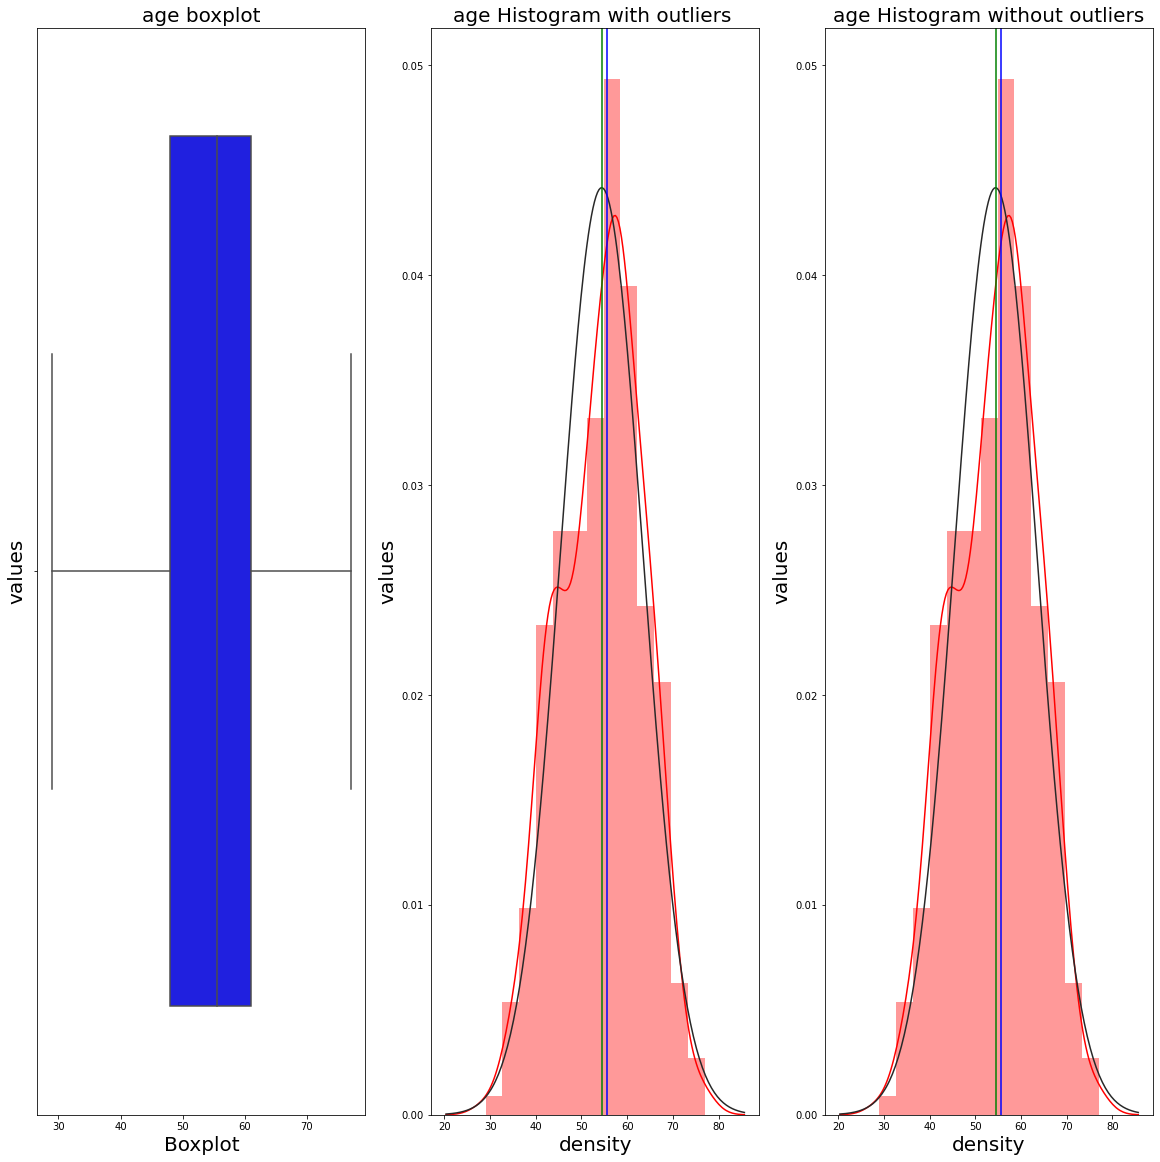

The trtbps has 9 outliers
Outlier percentage: 0.03
The trtbps has outlier values: [172 174 178 178 180 180 180 192 200]


8      172
101    178
110    180
203    180
223    200
241    174
248    192
260    178
266    180
Name: trtbps, dtype: int64

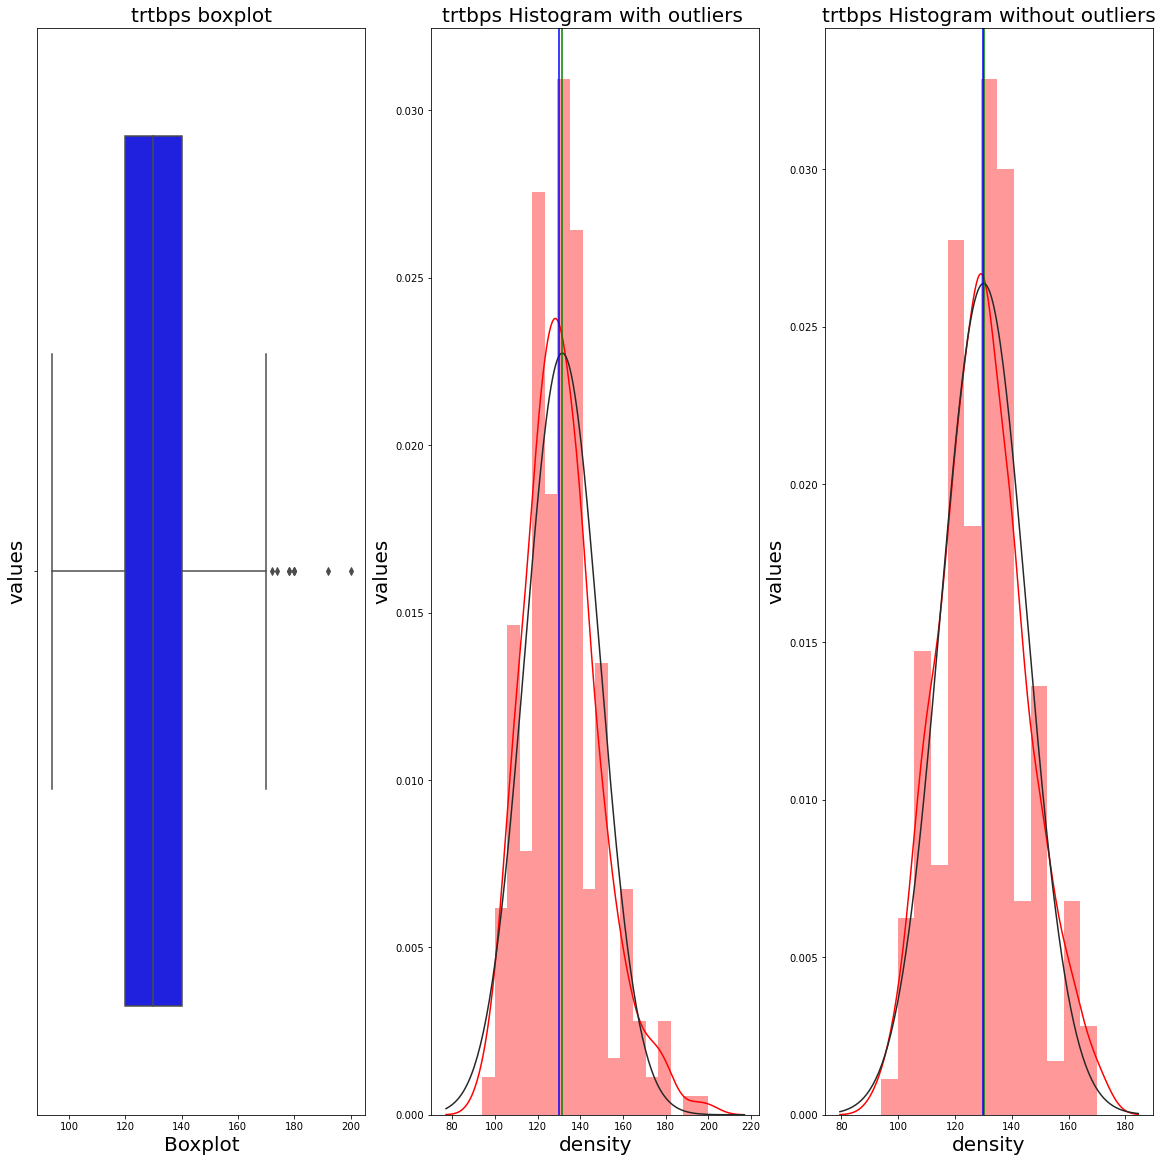

The chol has 5 outliers
Outlier percentage: 0.02
The chol has outlier values: [394 407 409 417 564]


28     417
85     564
96     394
220    407
246    409
Name: chol, dtype: int64

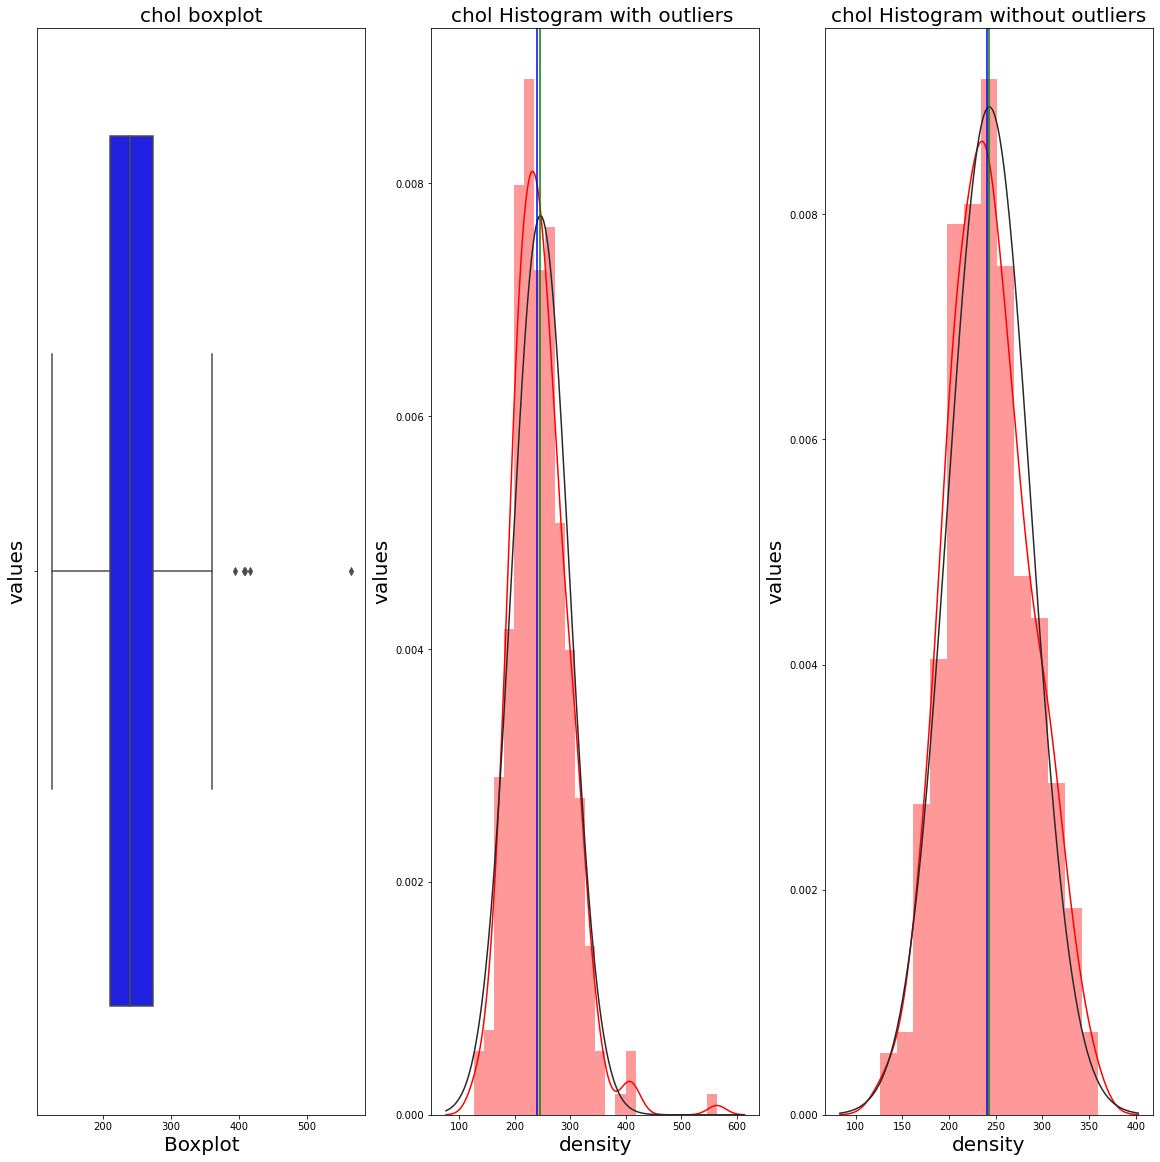

The thalachh has 1 outliers
Outlier percentage: 0.0
The thalachh has outlier values: [71]


272    71
Name: thalachh, dtype: int64

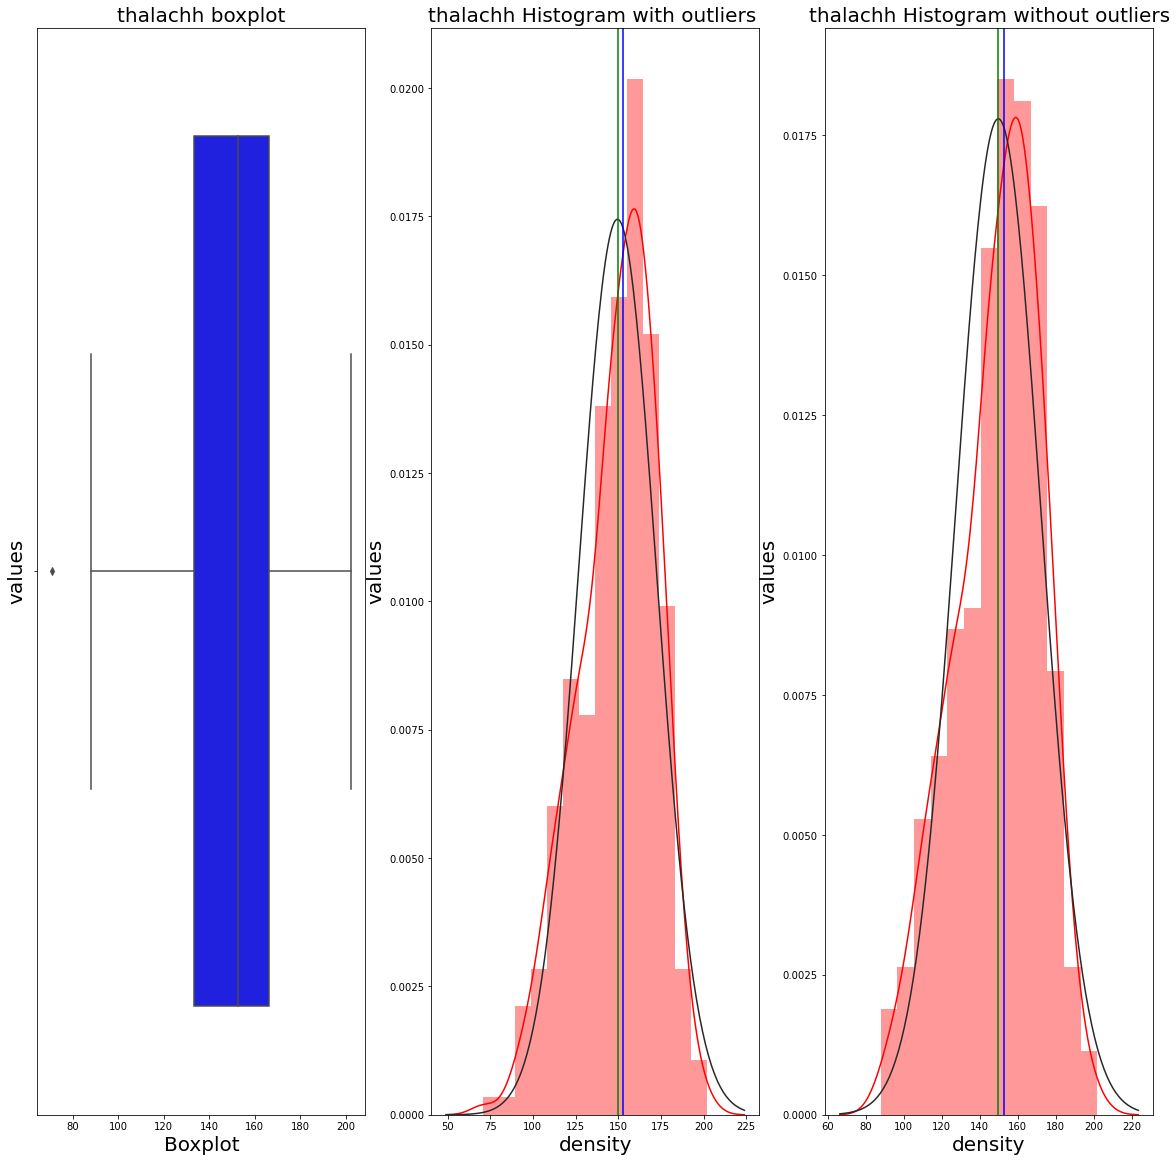

The oldpeak has 5 outliers
Outlier percentage: 0.02
The oldpeak has outlier values: [4.2 4.2 4.4 5.6 6.2]


101    4.2
204    6.2
221    5.6
250    4.2
291    4.4
Name: oldpeak, dtype: float64

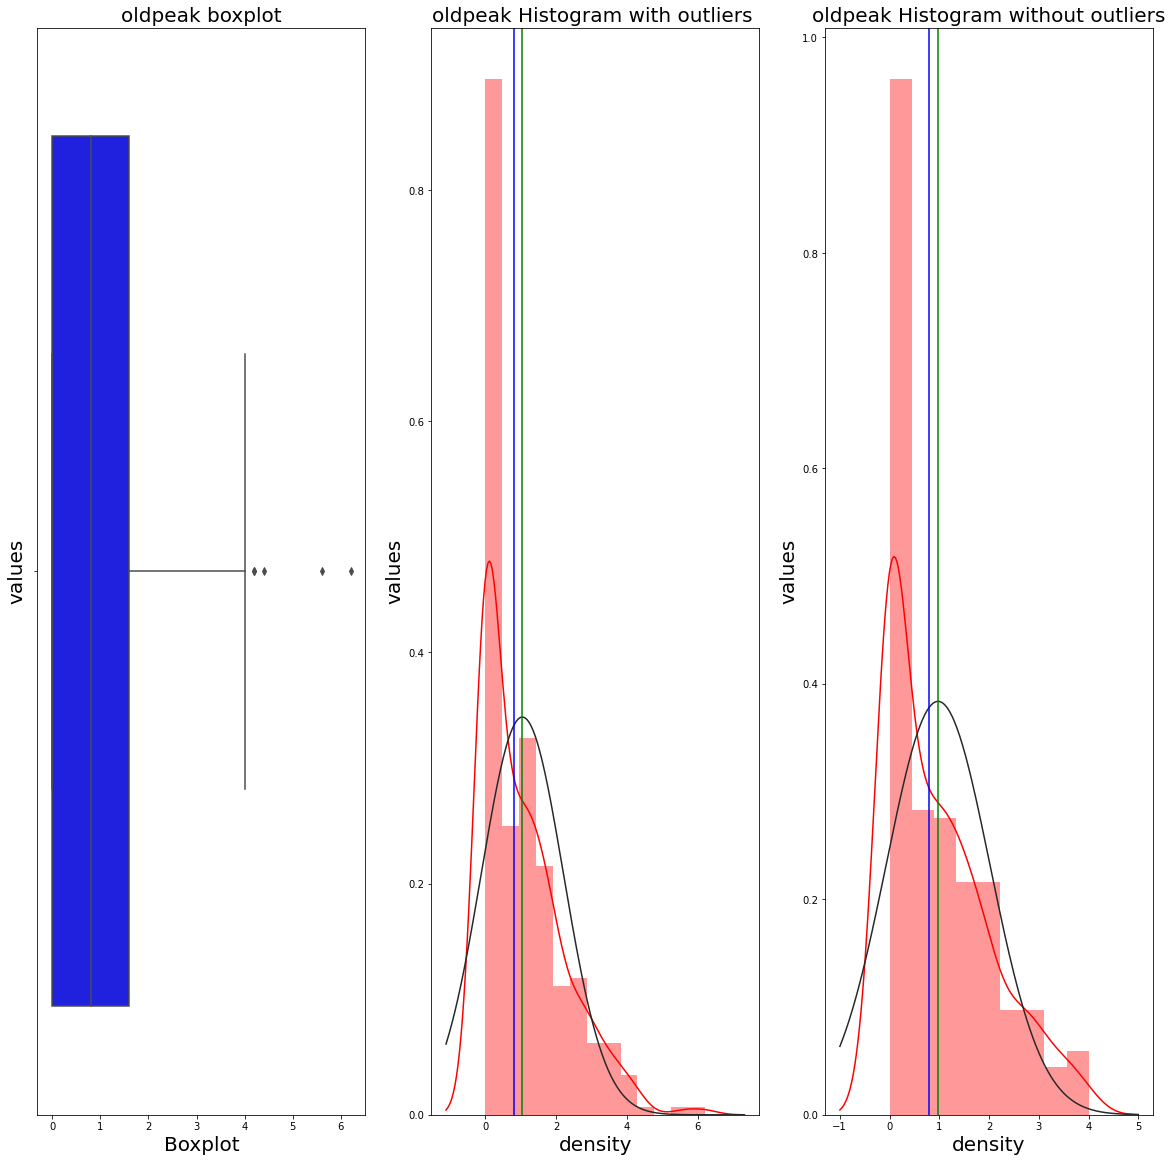

In [111]:
for x in columns_to_scale:
    ODT_plots(columns_to_scale,x)

In [112]:
# ODT refers to as the Outlier Detection Plot which defines the visualisation tecnhnique in order to, 
# give us a clear vision of the outlier summary stats viably representing the no.of outliers, the outlier values(data points),
# and the outlier percentage following a 3-graph approach as in a Boxlot, and two histograms' representing the visualisation,
# with or without outliers.

# By calling in the replace outier function inside the ODT function, we are replacing the outliers present in our data and
# dispaying the graphical representation for the same. 

In [113]:
custom_summary(columns_to_scale)

,Feature Name,Count,Minimum,Quartile1,Mean,Median,Quartile3,IQR,Maximum,Variance,Standard Deviation,Skewness,Kurtosis,Skeweness Comment,outlier_comment
0,age,302,29.0,48.0,54.420530,55.50,61.0,13.0,77.0,81.865757,9.047970,-0.203743,-0.527512,Fairly Symmetric(-ve),No outlier
1,trtbps,302,94.0,120.0,130.066225,130.00,140.0,20.0,170.0,229.477327,15.148509,0.248147,-0.148052,Fairly Symmetric(+ve),No outlier
2,chol,302,126.0,211.0,243.226821,240.25,272.5,61.5,360.0,1991.198381,44.622846,0.182629,-0.283441,Fairly Symmetric(+ve),No outlier
3,thalachh,302,88.0,134.5,149.839404,152.75,166.0,31.5,202.0,504.018143,22.450348,-0.458526,-0.302143,Fairly Symmetric(-ve),No outlier
4,oldpeak,302,0.0,0.0,0.974834,0.80,1.6,1.6,4.0,1.084282,1.041288,0.969950,0.097409,Moderately Skewed (+ve),No outlier


In [114]:
# Observation:
#1. All the outliers have been replaced and hence we can find no-outlier comment for all these features,
#2. The skewness have been fairly reduced,
#3. Data is fairly symmetric for the respective features,i.e the distribution of our data points are close to be referred as normal distribution.

In [115]:
# There is no need of Standard scaling here after because the data points are normally distributed after the outlier treatment.

# Feature Elimination using RFECV

model = LogisticRegression(solver='lbfgs')
rfecv = RFECV(model, 7)
fit = rfecv.fit(x, y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print("Importance Getter: %s" % fit.importance_getter)

In [116]:
ss = StandardScaler()
col = ['age','trtbps','chol','thalachh','oldpeak']
columns_to_scale[col] = ss.fit_transform(columns_to_scale[col])
columns_to_scale

,age,trtbps,chol,thalachh,oldpeak
0,0.949794,0.987461,-0.229564,0.007165,1.274733
1,-1.928548,-0.004379,0.152039,1.657982,2.429065
2,-1.485726,-0.004379,-0.880534,0.988732,0.408985
3,0.174856,-0.665606,-0.162222,1.256432,-0.168181
4,0.285561,-0.665606,2.486552,0.587182,-0.360569
...,...,...,...,...,...
298,0.285561,0.656848,-0.049986,-1.197485,-0.745346
299,-1.042904,-1.326832,0.466301,-0.795935,0.216596
300,1.503322,0.921338,-1.127454,-0.394385,2.332870
301,0.285561,-0.004379,-2.519182,-1.554418,0.216596


In [117]:
y = df['output']

In [118]:
x = df.drop('output',axis=1)

In [119]:
# Spliting the data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)



In [120]:
Remaining_features = df.iloc[:,[1,2,5,6,8,10,11,12,13]]
Remaining_features

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
300,1,0,1,1,0,1,2,3,0
301,1,0,0,1,1,1,1,3,0


In [121]:
scaled_df = pd.concat([columns_to_scale,Remaining_features],axis=1)
scaled_df =pd.get_dummies(scaled_df,columns =['exng','thall','slp','cp','caa','restecg','sex','fbs'])

In [122]:
scaled_df

,age,trtbps,chol,thalachh,oldpeak,output,exng_0,exng_1,thall_0,thall_1,...,caa_2,caa_3,caa_4,restecg_0,restecg_1,restecg_2,sex_0,sex_1,fbs_0,fbs_1
0,0.949794,0.987461,-0.229564,0.007165,1.274733,1,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1
1,-1.928548,-0.004379,0.152039,1.657982,2.429065,1,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
2,-1.485726,-0.004379,-0.880534,0.988732,0.408985,1,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,0.174856,-0.665606,-0.162222,1.256432,-0.168181,1,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,0.285561,-0.665606,2.486552,0.587182,-0.360569,1,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.285561,0.656848,-0.049986,-1.197485,-0.745346,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
299,-1.042904,-1.326832,0.466301,-0.795935,0.216596,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
300,1.503322,0.921338,-1.127454,-0.394385,2.332870,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,1
301,0.285561,-0.004379,-2.519182,-1.554418,0.216596,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0


In [123]:
y1 = scaled_df['output']

In [124]:
scaled_df = scaled_df.drop('output',axis=1)

In [125]:
scaled_df

,age,trtbps,chol,thalachh,oldpeak,exng_0,exng_1,thall_0,thall_1,thall_2,...,caa_2,caa_3,caa_4,restecg_0,restecg_1,restecg_2,sex_0,sex_1,fbs_0,fbs_1
0,0.949794,0.987461,-0.229564,0.007165,1.274733,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
1,-1.928548,-0.004379,0.152039,1.657982,2.429065,1,0,0,0,1,...,0,0,0,0,1,0,0,1,1,0
2,-1.485726,-0.004379,-0.880534,0.988732,0.408985,1,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
3,0.174856,-0.665606,-0.162222,1.256432,-0.168181,1,0,0,0,1,...,0,0,0,0,1,0,0,1,1,0
4,0.285561,-0.665606,2.486552,0.587182,-0.360569,0,1,0,0,1,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.285561,0.656848,-0.049986,-1.197485,-0.745346,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
299,-1.042904,-1.326832,0.466301,-0.795935,0.216596,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
300,1.503322,0.921338,-1.127454,-0.394385,2.332870,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,1
301,0.285561,-0.004379,-2.519182,-1.554418,0.216596,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0


# Model Building

In [126]:
def model_accuracy(x,y):

    from sklearn.model_selection import cross_val_score,StratifiedKFold
    # Making an object
    lr = LogisticRegression()
    knn = KNeighborsClassifier() # We can check the no.of neighbors by elbow method but firstly we will try it as by default
    dt = DecisionTreeClassifier()
    svc =SVC()
    rf = RandomForestClassifier()
    gb = GradientBoostingClassifier()
    adaboost = AdaBoostClassifier()
    xgb = XGBClassifier()
    
    
    
    # fit the model
    lr.fit(x_train,y_train)
    knn.fit(x_train,y_train)
    dt.fit(x_train,y_train)
    svc.fit(x_train,y_train)
    rf.fit(x_train,y_train)
    gb.fit(x_train,y_train)
    adaboost.fit(x_train,y_train)
    xgb.fit(x_train,y_train)
    
    
    # predict and check the accuracy and cross val score
    lr_pred = lr.predict(x_test)
    lr_accuracy = accuracy_score(y_test,lr_pred)
    cross_val_score_lr = cross_val_score(lr,x,y,cv=100)
    
    knn_pred = knn.predict(x_test)
    knn_accuracy = accuracy_score(y_test,knn_pred)
    cross_val_score_knn = cross_val_score(knn,x,y,cv=100)
        
    dt_pred = dt.predict(x_test)
    dt_accuracy = accuracy_score(y_test,dt_pred)
    cross_val_score_dt = cross_val_score(dt,x,y,cv=100)
    
         
    svc_pred = svc.predict(x_test)
    svc_accuracy = accuracy_score(y_test,svc_pred)
    cross_val_score_svc = cross_val_score(svc,x,y,cv=100)
    
         
    rf_pred = rf.predict(x_test)
    rf_accuracy = accuracy_score(y_test,rf_pred)
    cross_val_score_rf = cross_val_score(rf,x,y,cv=100)
    
         
    gb_pred = gb.predict(x_test)
    gb_accuracy = accuracy_score(y_test,gb_pred)
    cross_val_score_gb = cross_val_score(gb,x,y,cv=100)
    
    adaboost_pred = adaboost.predict(x_test)
    adaboost_accuracy = accuracy_score(y_test,adaboost_pred)
    cross_val_score_adaboost = cross_val_score(adaboost,x,y,cv=100)
    
    xgb_pred = xgb.predict(x_test)
    xgb_accuracy = accuracy_score(y_test,xgb_pred)
    cross_val_score_xgb = cross_val_score(xgb,x,y,cv=100)
    
    
     # Stratified K fol cross validation
    accuracy_list_lr = []
    accuracy_list_knn = []
    accuracy_list_dt = []
    accuracy_list_svc = []
    accuracy_list_rf = []
    accuracy_list_gb = []
    accuracy_list_adaboost =[]
    accuracy_list_xgb = []
    
        
    skf = StratifiedKFold(n_splits=10,random_state=100,shuffle=True)    #n_splits = No. of splits or folds you want
                                      # random_state = 100 means hundred times it will shuffle
    
    for train_data,test_data in skf.split(x,y):     # Splitting entire x and y intro train and test data
        x1_train = x.iloc[train_data]          # assigning independent variables to xtrain from train data
        y1_train = y.iloc[train_data]          # assigning dependent variables to ytrain from train data
        x1_test =  x.iloc[test_data]           # assigning independent variables to xtrain from test data
        y1_test =  y.iloc[test_data]           # assigning dependent variables to ytrain from test data
        
        lr.fit(x1_train,y1_train)
        lr_predict = lr.predict(x1_test)
        sc_lr = accuracy_score(y1_test,lr_predict)
        accuracy_list_lr.append(sc_lr)
        
        knn.fit(x1_train,y1_train)
        knn_predict = knn.predict(x1_test)
        sc_knn = accuracy_score(y1_test,knn_predict)
        accuracy_list_knn.append(sc_knn)
        
        dt.fit(x1_train,y1_train)
        dt_predict = dt.predict(x1_test)
        sc_dt= accuracy_score(y1_test,dt_predict)
        accuracy_list_dt.append(sc_dt)
        
        svc.fit(x1_train,y1_train)
        svc_predict = svc.predict(x1_test)
        sc_svc= accuracy_score(y1_test,svc_predict)
        accuracy_list_svc.append(sc_svc)
        
        rf.fit(x1_train,y1_train)
        rf_predict = rf.predict(x1_test)
        sc_rf= accuracy_score(y1_test,rf_predict)
        accuracy_list_rf.append(sc_rf)
        
        gb.fit(x1_train,y1_train)
        gb_predict = gb.predict(x1_test)
        sc_gb= accuracy_score(y1_test,gb_predict)
        accuracy_list_gb.append(sc_gb)
        
        adaboost.fit(x1_train,y1_train)
        adaboost_predict = adaboost.predict(x1_test)
        sc_adaboost = accuracy_score(y1_test,adaboost_predict)
        accuracy_list_adaboost.append(sc_adaboost)
        
        xgb.fit(x1_train,y1_train)
        xgb_predict = xgb.predict(x1_test)
        sc_xgb = accuracy_score(y1_test,xgb_predict)
        accuracy_list_xgb.append(sc_xgb)
        
    model_name = ['Logistic','KNN','Decision Tree','SVC','Random Forest','Gradient Boosting','Adaboost','XGBoost']
    accuracy = [lr_accuracy,knn_accuracy,dt_accuracy,svc_accuracy,rf_accuracy,gb_accuracy,adaboost_accuracy,xgb_accuracy]
    cross_val_score = [cross_val_score_lr.mean(),cross_val_score_knn.mean(),cross_val_score_dt.mean(),cross_val_score_svc.mean(),cross_val_score_rf.mean(),cross_val_score_gb.mean(),cross_val_score_adaboost.mean(),cross_val_score_xgb.mean()]
    accuracy_skf = [np.mean(accuracy_list_lr),np.mean(accuracy_list_knn),np.mean(accuracy_list_dt),np.mean(accuracy_list_svc),np.mean(accuracy_list_rf),np.mean(accuracy_list_gb),np.mean(accuracy_list_adaboost),np.mean(accuracy_list_xgb)]
    
    result = pd.DataFrame([model_name,accuracy,cross_val_score,accuracy_skf],index = ['Model Name','Test_Accuracy','Cross_Val_Score','Stratified kfold Accuracy']).T
    
    return result
    
    

In [127]:
model_accuracy(scaled_df,y1)

[20:10:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:12:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:12:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:12:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,Model Name,Test_Accuracy,Cross_Val_Score,Stratified kfold Accuracy
0,Logistic,0.852459,0.84,0.844409
1,KNN,0.655738,0.84,0.844624
2,Decision Tree,0.836066,0.7125,0.758065
3,SVC,0.704918,0.85,0.841075
4,Random Forest,0.868852,0.843333,0.837527
5,Gradient Boosting,0.836066,0.803333,0.804409
6,Adaboost,0.786885,0.7875,0.784624
7,XGBoost,0.852459,0.793333,0.794516


### Hence it can be concluded that "Logistic Regression" is the one to perform consistently which is thus observed after cross validation